In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import sqrt

import DataAid
import DataImporter
import Neros

In [40]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
#mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")
# Get the galaxies we want from each source
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
#MWMcGaugh = np.array(McGaughMW['MWmcg_lum'])

# chi squared function
def chiSquared(observed, expected, error):
    chiSquared = 0
    
    for i in range(len(observed)):
        chiSquared = chiSquared + (((observed[i] - expected[i])**2) / (error[i]**2))
        
    return chiSquared / len(observed)

# Fit function
def simple(independents, alpha, vLumFreeParam, phiZero):
    # Parse out data for the galaxy
    rad,vLum = independents
    # Apply the vLum free param to the data
    vLum = vLum*vLumFreeParam
    # Calc vLCM with alpha free param
    vLcm = Neros.vLcm(rad, MW_vLum_interp_func(rad), vLum, phiZero)
    # Calc and return vNeros
    return Neros.vNeros(vLum, vLcm, alpha)

## Create the Milky Way interpolation function

In [41]:
MW_rad = MWXueSofue[:,0]
MW_vLum = MWXueSofue[:,1]
# Interpolation function
MW_vLum_interp_func = interp1d(MW_rad, MW_vLum, kind='cubic')

## Running VNeros on every galaxy
We calculate vNeros for each galaxy and then plot the ratio between vNeros and the galaxy's vObs

/Users/sophiacisneros/Desktop/RCFM_Gen/RCFM/Neros.py:78: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.square(Other_Vlum) + (vLCM*freeParam) )
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


galaxyName is: ddo47_rotmas_input_velocities
chiSquare is: 3703.00866472827
fittedAlpha is: -9081.607639190623, 
fittedVLumFreeParam is: 0.8847194875431483
MW_Phi is: [3.28383339e-07 7.93004448e-07 1.04584287e-06 1.20501056e-06
 1.31002810e-06 1.39280174e-06 1.45938647e-06 1.51441109e-06
 1.55916097e-06 1.59960986e-06 1.63482770e-06 1.66463299e-06
 1.69253863e-06 1.71774765e-06 1.73982827e-06 1.76100252e-06
 1.78051417e-06 1.79793934e-06 1.81499796e-06 1.83103453e-06
 1.84553350e-06 1.85982291e-06 1.87333010e-06 1.88620907e-06
 1.89796956e-06 1.90967732e-06 1.92081815e-06 1.93100173e-06
 1.94120927e-06 1.95100244e-06 1.95993391e-06 1.96883697e-06
 1.97739162e-06 1.98525318e-06]
Other_Phi is: [1.08668056e-09 4.39648860e-09 1.04930165e-08 1.91974060e-08
 2.99732807e-08 4.44483150e-08 6.37251965e-08 8.91677216e-08
 1.20220188e-07 1.59408925e-07 2.04147128e-07 2.52469512e-07
 3.10179060e-07 3.75940293e-07 4.45759979e-07 5.24137265e-07
 6.06146934e-07 6.87479525e-07 7.75080583e-07 8.6465346

galaxyName is: haro36_rotmas_input_velocities
chiSquare is: 0.20658909633324485
fittedAlpha is: 28333.22561572609, 
fittedVLumFreeParam is: 1.002403883393231
MW_Phi is: [3.22951491e-07 7.78594619e-07 1.00903088e-06 1.14389120e-06
 1.24204976e-06 1.31501016e-06 1.37542023e-06 1.42354622e-06
 1.46538433e-06 1.50147913e-06]
Other_Phi is: [2.28631111e-10 8.41842959e-10 1.75032730e-09 2.70938976e-09
 3.64026113e-09 4.41199349e-09 5.03061594e-09 5.49931194e-09
 5.88209632e-09 6.19892284e-09]
--------------------------
galaxyName is: ddo133_rotmas_input_velocities
chiSquare is: 16.315619308418068
fittedAlpha is: 14550.283087487964, 
fittedVLumFreeParam is: 1.6825127831660727
MW_Phi is: [3.28819541e-07 8.39659804e-07 1.09200630e-06 1.25582773e-06
 1.37797298e-06 1.46450630e-06 1.53283137e-06 1.59303822e-06
 1.64152059e-06 1.68337479e-06 1.72213983e-06 1.75468106e-06
 1.78371329e-06 1.81122494e-06 1.83493372e-06 1.85668926e-06
 1.87783593e-06 1.89643100e-06 1.91378757e-06]
Other_Phi is: [1.9520

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


galaxyName is: ddo168_rotmas_input_velocities
chiSquare is: 4.344676988424355
fittedAlpha is: 10751.811968726406, 
fittedVLumFreeParam is: 1.2317318042295682
MW_Phi is: [3.30301971e-07 8.24628677e-07 1.09524183e-06 1.27802298e-06
 1.41256557e-06 1.52388465e-06 1.60417774e-06 1.67016605e-06
 1.72553824e-06 1.77295821e-06 1.81472600e-06 1.85210731e-06
 1.88576434e-06 1.91610740e-06 1.94375114e-06 1.96914361e-06
 1.99444204e-06 2.01594561e-06 2.03587103e-06 2.05438221e-06
 2.07168254e-06 2.08794992e-06 2.10329708e-06 2.11776772e-06
 2.13148766e-06 2.14454843e-06 2.15699344e-06 2.16985509e-06
 2.18118917e-06 2.19200452e-06 2.20235238e-06 2.21231571e-06
 2.22193435e-06]
Other_Phi is: [4.79494444e-11 2.44313611e-10 6.68270000e-10 1.28012417e-09
 1.95625367e-09 2.66884769e-09 3.28950195e-09 3.90058015e-09
 4.51349544e-09 5.08825850e-09 5.60147283e-09 6.06960832e-09
 6.48794590e-09 6.85543543e-09 7.19346794e-09 7.51267056e-09
 7.84267277e-09 8.13200777e-09 8.40781755e-09 8.67205695e-09
 8.9181

ValueError: A value in x_new is below the interpolation range.

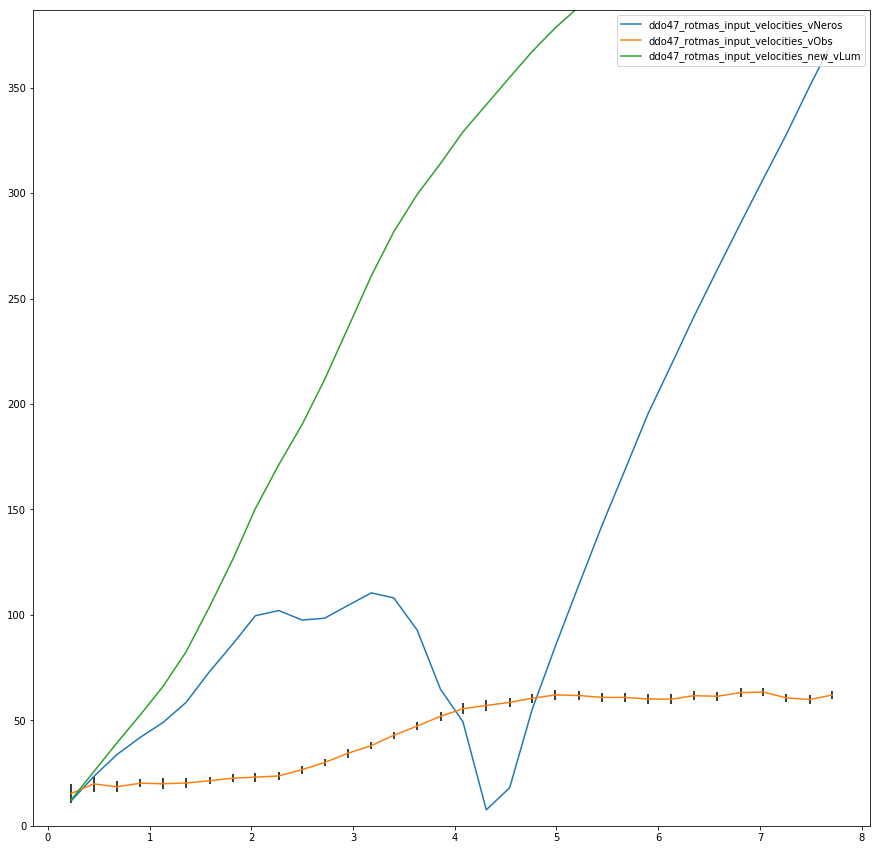

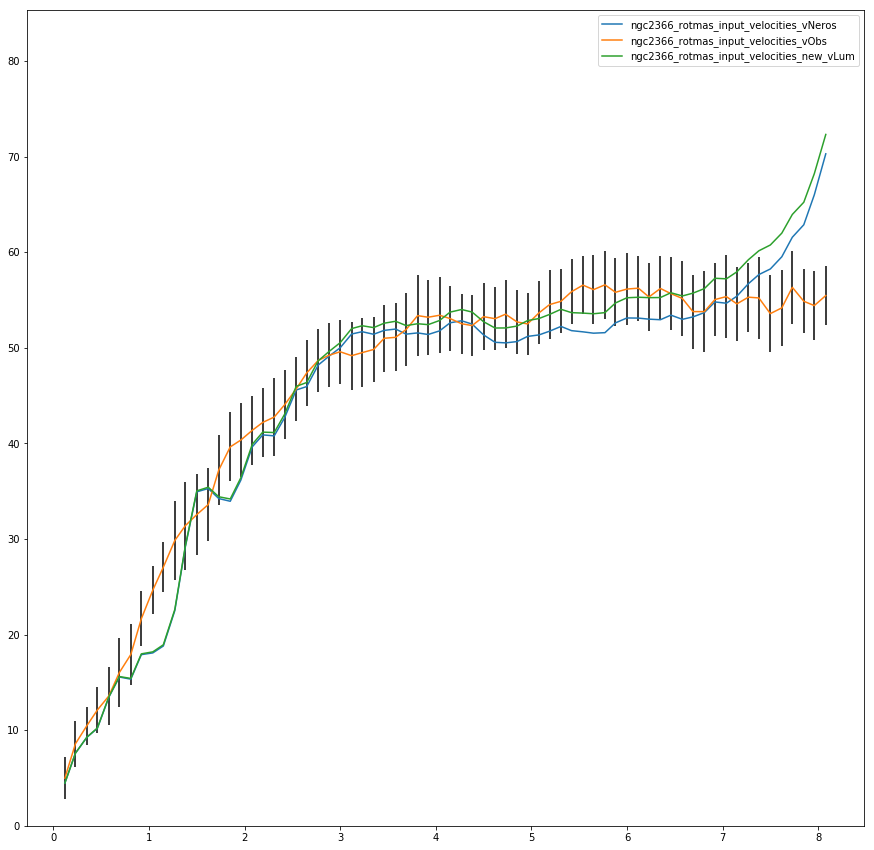

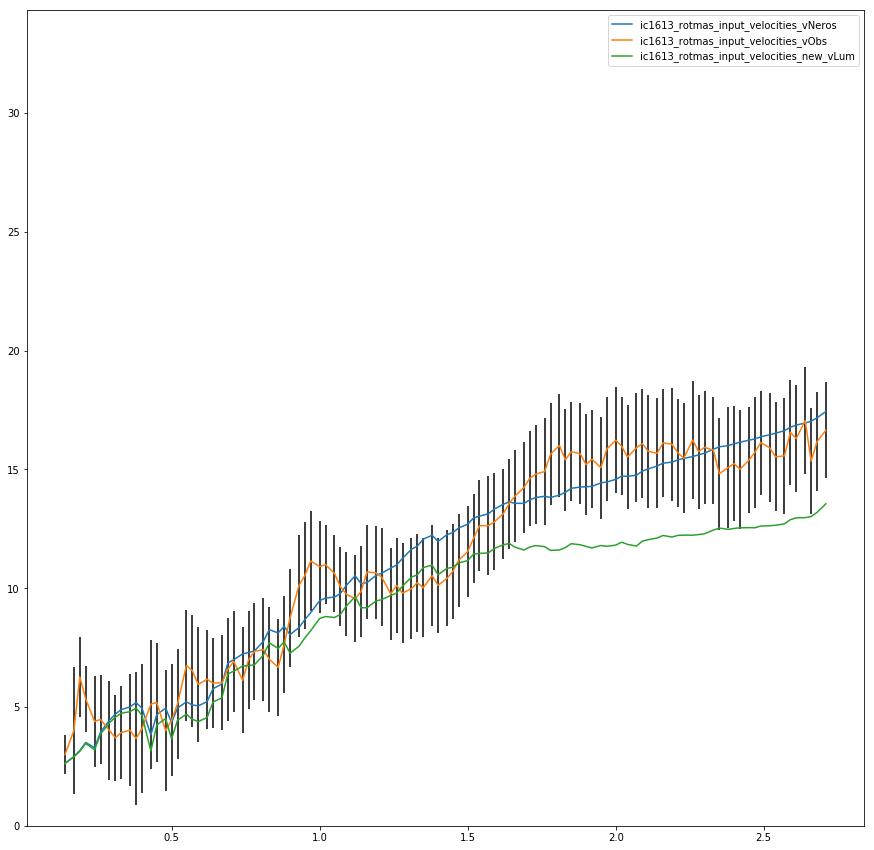

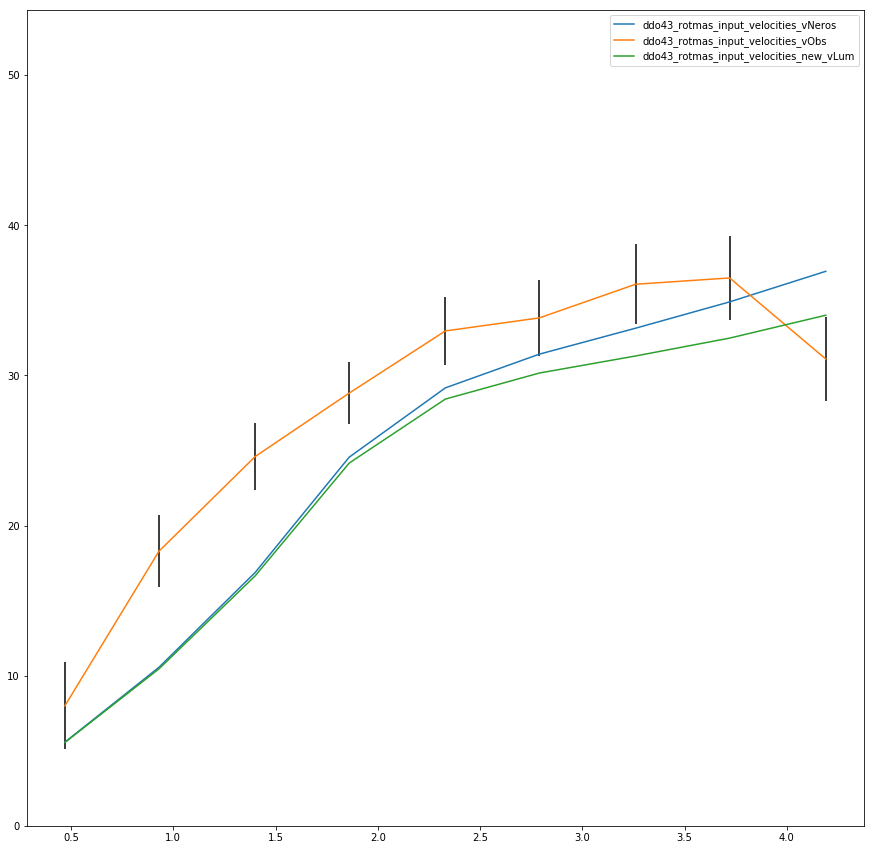

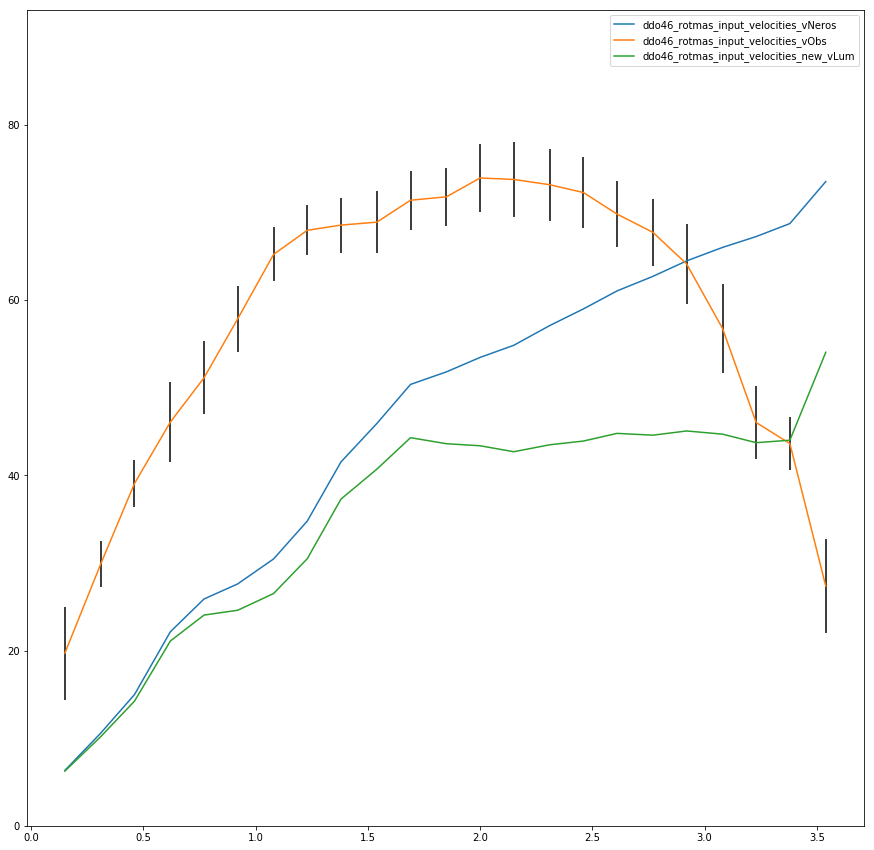

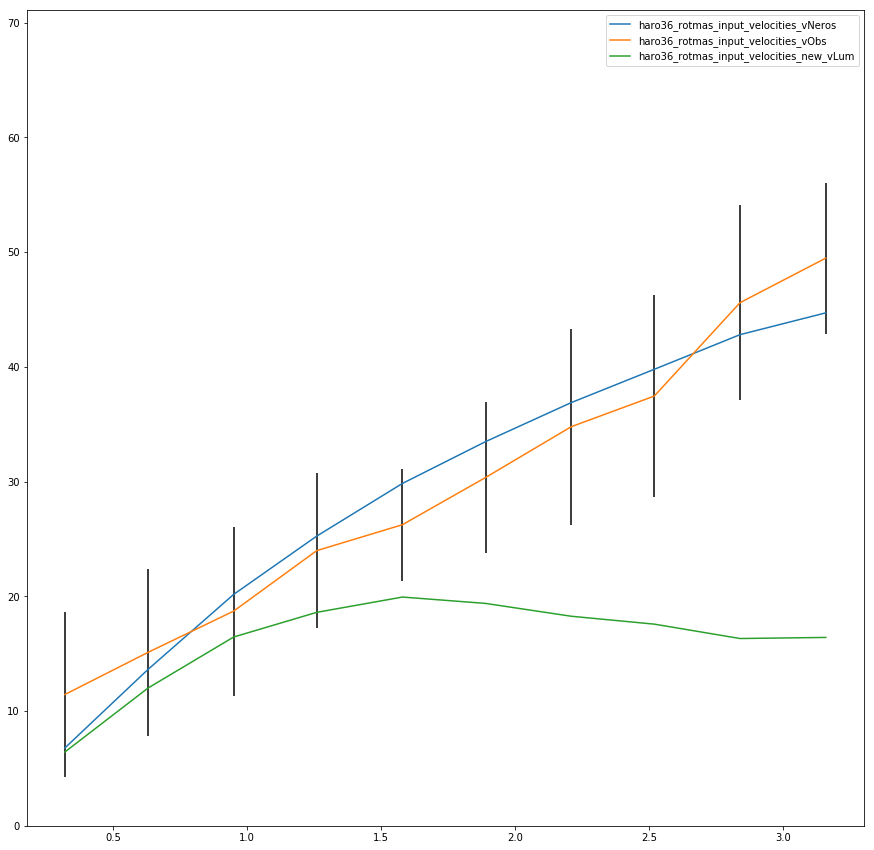

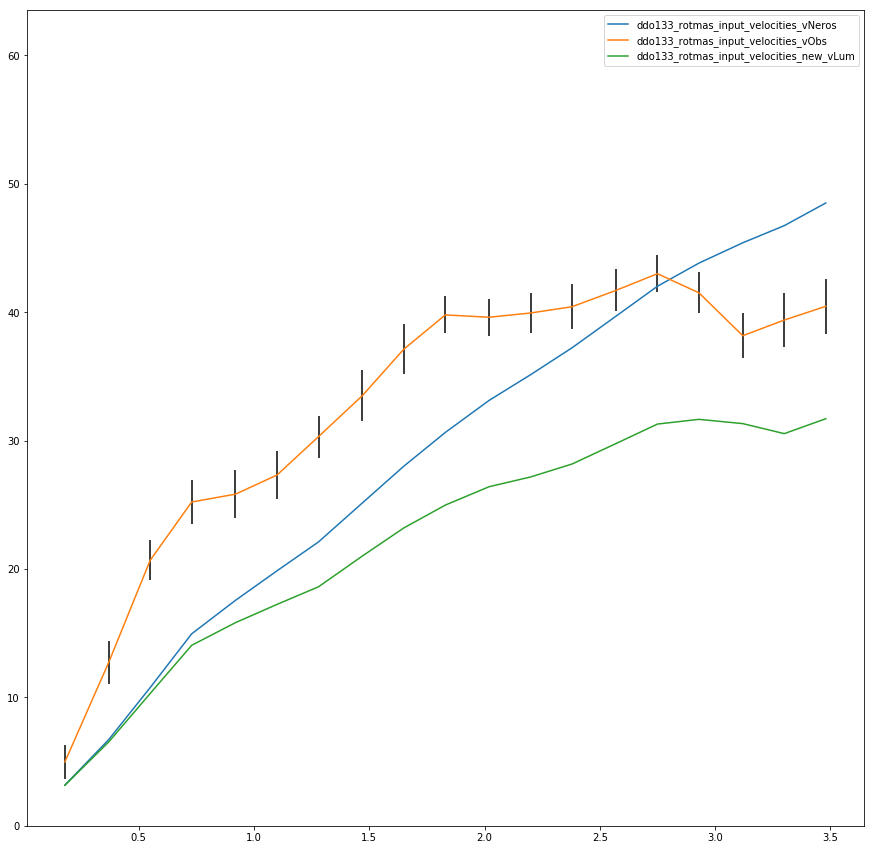

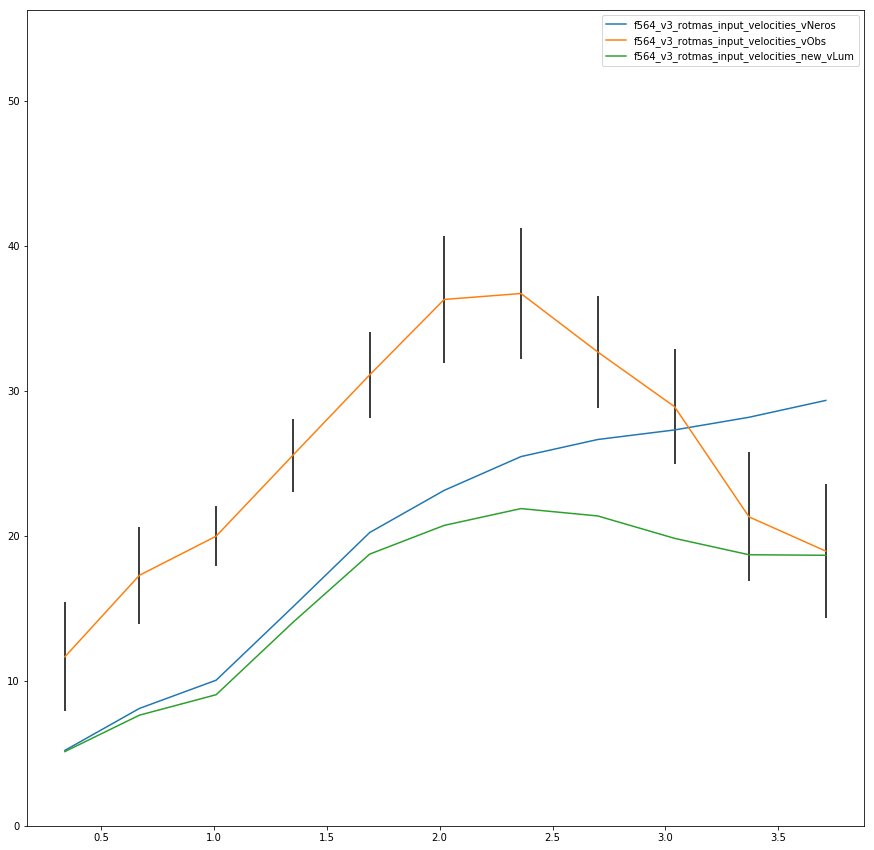

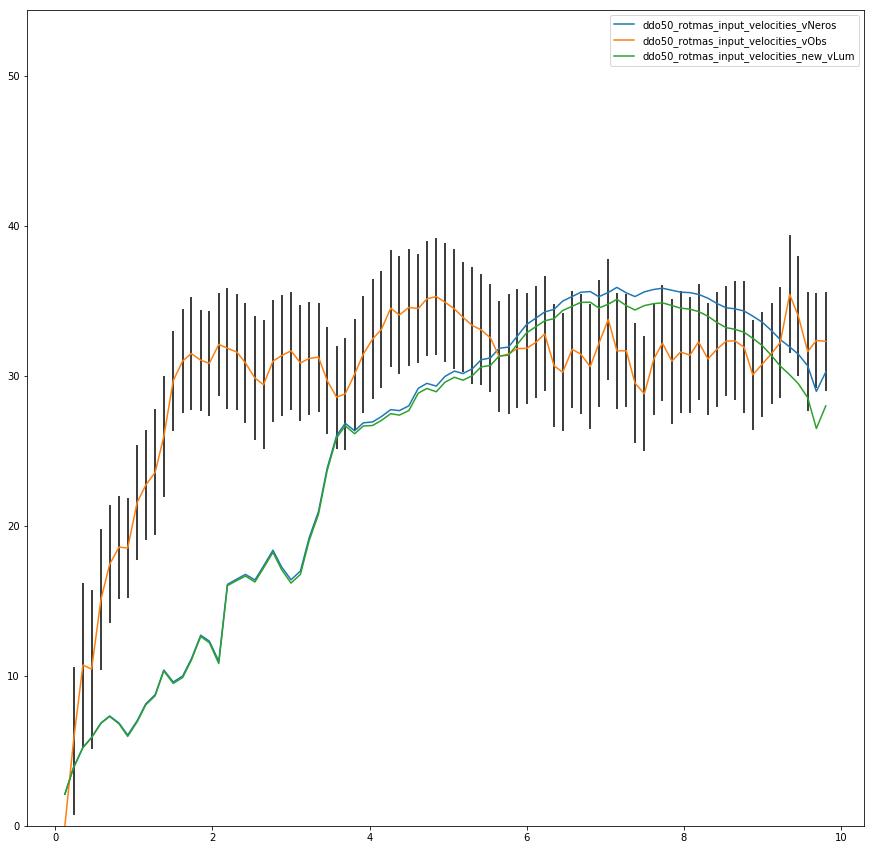

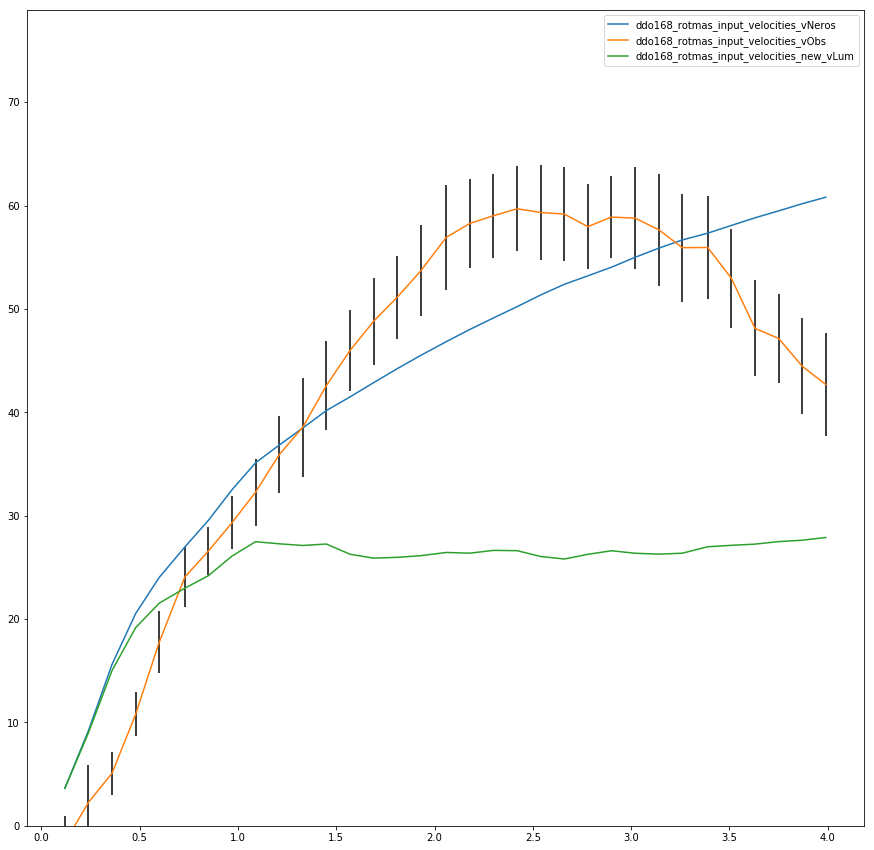

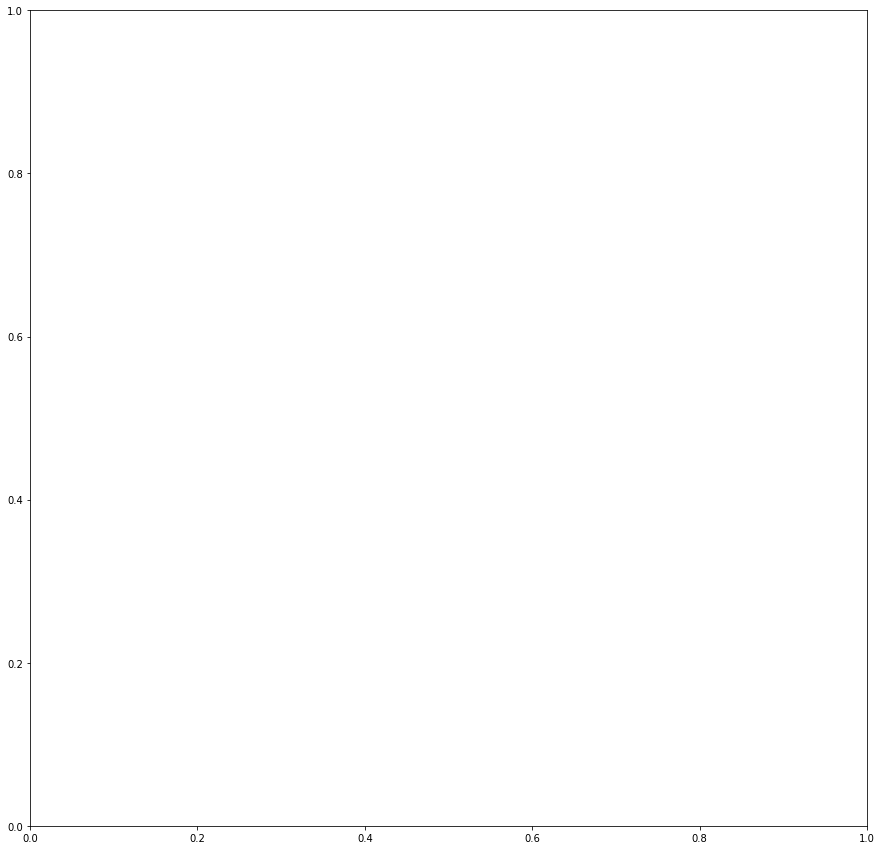

In [42]:
# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data.csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2}\n'.format("Galaxy", "Alpha", "Beta"))
f.close()

vLcmList = []

avgChiSquared = 0.0
avgPhiZero = 0.0

# Change this and uncomment if statement below if just one galaxy is desired.
galaxyWeWant = " "

for galaxyName in littleDataGalaxies:
    # Uncomment the following two lines to produce data and graphs for just galaxyWeWant
    #if (galaxyName != galaxyWeWant):
     #  continue
    
    # data on this galaxy
    f, ax = plt.subplots(1, figsize = (15, 15))
    galaxy = np.array(littleDataGalaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]
    galaxy_vLumSquared = Neros.vLumSquared(galaxy_gas, galaxy_disk, galaxy_bulge)
    galaxy_vLum = np.sqrt(galaxy_vLumSquared)
    
    # Make sure the arrays are matching lengths
    maxMWRad = MW_rad[len(MW_rad)-1]
    for i in range(len(galaxy_rad)):
        if galaxy_rad[i] > maxMWRad:
            galaxy_rad = galaxy_rad[:i]
            galaxy_vLum = galaxy_vLum[:i]
            galaxy_vObs = galaxy_vObs[:i]
            break
    
    # fitter
    vals, cov = curve_fit(simple,(galaxy_rad, galaxy_vLum),galaxy_vObs)
    fittedAlpha, fittedVLumFreeParam, fittedPhiZero = vals

    avgPhiZero = avgPhiZero + fittedPhiZero
    
    # Run vLCM
    vLcm = Neros.vLcm(galaxy_rad, MW_vLum_interp_func(galaxy_rad), galaxy_vLum, fittedPhiZero)
    vLcmList.append(vLcm)
    vNeros = simple((galaxy_rad, galaxy_vLum), fittedAlpha, fittedVLumFreeParam, fittedPhiZero)
    ratio = vNeros/galaxy_vObs
    
    # printing to file & console
    chiSquare = chiSquared(galaxy_vObs, vNeros, galaxy_error)
    avgChiSquared = avgChiSquared + chiSquare
    print(f"galaxyName is: {galaxyName}")
    
    print(f"chiSquare is: {chiSquare}")
    
    print(f"fittedAlpha is: {fittedAlpha}, \nfittedVLumFreeParam is: {fittedVLumFreeParam}")
    
    print(f"MW_Phi is: {Neros.phi(galaxy_rad, MW_vLum_interp_func(galaxy_rad))}")
    
    print(f"Other_Phi is: {Neros.phi(galaxy_rad, galaxy_vLum)}")
    
    print("--------------------------")
    
    # Write galaxyName, fittedAlpha, fittedVLumFreeParam to file
    with open(out_file, 'a') as f:
        f.write('{0},{1},{2}\n'.format(galaxyName, fittedAlpha, fittedVLumFreeParam))
    f.close()
    
    # Calculate galaxy_vObs plus error and put into list
    galaxy_vObs_err_incl = []
    for i in range(len(galaxy_vObs)):
        galaxy_vObs_err_incl.append(galaxy_vObs[i] + galaxy_error[i])
        
    # calculate new vLum
    galaxy_vLum_updated = []
    for i in range(len(galaxy_vLum)):
        galaxy_vLum_updated.append(galaxy_vLum[i] * fittedVLumFreeParam)
        
    # plot
    # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
    # or to the maximum value in the list vNeros, whichever is the bigger number
    y_max = max(max(galaxy_vObs_err_incl), max(vNeros))
    ax.set_ylim(bottom = 0, top = y_max + 15)
    
    # plot vObs and vNeros and updated vLum
    ax.plot(galaxy_rad, vNeros, label="{}_vNeros".format(galaxyName))
    ax.plot(galaxy_rad, galaxy_vObs, label="{}_vObs".format(galaxyName))
    ax.plot(galaxy_rad, galaxy_vLum_updated, label="{}_new_vLum".format(galaxyName))
    
    # error bar in vObs
    for i in range(len(galaxy_rad)):
        ax.vlines(galaxy_rad[i], galaxy_vObs[i] - galaxy_error[i], galaxy_vObs[i] + galaxy_error[i])
        
    ax.legend(loc="upper right")

    graph_file_name = "graphs/" + str(galaxyName)

    plt.savefig(graph_file_name)

print(avgChiSquared / len(littleDataGalaxies))
print(avgPhiZero / len(littleDataGalaxies))
#print Neros.kappa(MW_phi, Other_phi, phiZero)

    

In [ ]:
!ls -la data/McGaugh/


In [ ]:
!rm data/McGaugh/.DS_Store
